In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df = df.iloc[:, 1:]

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
df.shape

(100, 3)

In [7]:
df.info

<bound method DataFrame.info of     cgpa     iq  placement
0    6.8  123.0          1
1    5.9  106.0          0
2    5.3  121.0          0
3    7.4  132.0          1
4    5.8  142.0          0
..   ...    ...        ...
95   4.3  200.0          0
96   4.4   42.0          0
97   6.7  182.0          1
98   6.3  103.0          1
99   6.2  113.0          1

[100 rows x 3 columns]>

In [8]:
import matplotlib.pyplot as plt

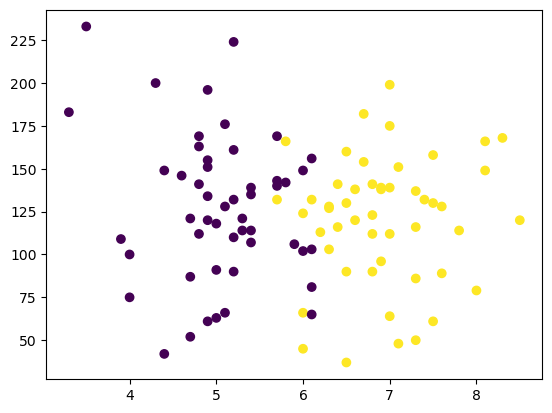

In [9]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [10]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [11]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

In [14]:
X_train

,cgpa,iq
91,7.5,158.0
80,4.9,196.0
94,4.7,52.0
39,4.6,146.0
84,5.7,169.0
...,...,...
43,6.8,141.0
75,4.8,169.0
81,5.4,107.0
37,8.1,149.0


In [15]:
X_test

,cgpa,iq
8,6.1,156.0
62,6.0,102.0
40,4.9,134.0
41,5.4,114.0
95,4.3,200.0
35,6.8,90.0
51,4.8,141.0
82,6.5,37.0
48,6.6,138.0
99,6.2,113.0


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_train

array([[ 1.27264986,  0.86610485],
       [-0.95806226,  1.82563793],
       [-1.1296555 , -1.8104874 ],
       [-1.21545212,  0.56309441],
       [-0.2716893 ,  1.14386443],
       [-0.95806226, -1.58322957],
       [ 1.10105662, -1.86098915],
       [ 1.53003972, -0.24493344],
       [ 1.27264986, -1.58322957],
       [ 0.67207352, -0.01767561],
       [ 0.84366676,  0.38633832],
       [-0.61487578, -0.24493344],
       [-0.01429944,  0.00757526],
       [-0.2716893 ,  0.41158919],
       [-1.1296555 , -0.92670694],
       [-0.7006724 , -0.34593692],
       [-0.95806226,  0.68934876],
       [ 1.10105662, -0.1944317 ],
       [-0.7006724 , -0.85095433],
       [ 0.5862769 ,  0.76510137],
       [-1.04385888,  0.9923592 ],
       [ 0.75787014,  0.38633832],
       [ 2.13061606, -0.09342822],
       [-0.7006724 ,  0.20958222],
       [ 0.07149718, -1.07821216],
       [ 0.41468366, -0.85095433],
       [-0.61487578, -0.06817735],
       [-0.2716893 ,  0.4873418 ],
       [ 0.67207352,

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_test

array([[ 0.07149718,  0.81560311],
       [-0.01429944, -0.54794389],
       [-0.95806226,  0.26008396],
       [-0.52907916, -0.24493344],
       [-1.47284198,  1.92664141],
       [ 0.67207352, -0.85095433],
       [-1.04385888,  0.43684006],
       [ 0.41468366, -2.18925046],
       [ 0.50048028,  0.36108745],
       [ 0.1572938 , -0.27018431]])

In [22]:
# logistic regression
from sklearn.linear_model import LogisticRegression

In [23]:
clf = LogisticRegression()

In [24]:
clf.fit(X_train, Y_train)

LogisticRegression()

In [25]:
# Evaluate model - calculate accuracy on test data
y_predicted = clf.predict(X_test)

In [26]:
y_predicted

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [27]:
Y_test

8     0
62    0
40    0
41    0
95    0
35    1
51    0
82    1
48    1
99    1
Name: placement, dtype: int64

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(Y_test, y_predicted)

0.8

In [30]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

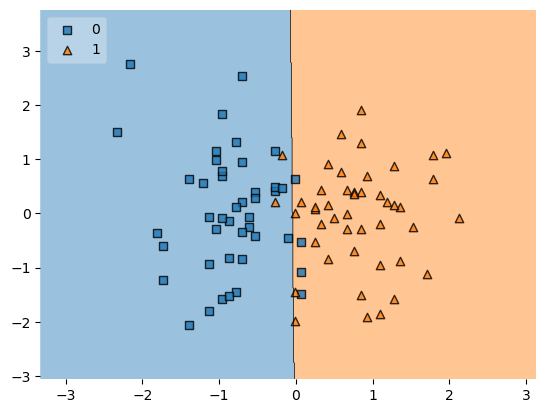

In [31]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [32]:
import pickle

In [33]:
pickle.dump(clf, open('model.pkl', 'wb'))